In [73]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from glob import glob
import cv2
import torch
from natsort import natsorted
from skimage.metrics import structural_similarity as ssim

In [56]:
def MSE(x, y, mask):
    return np.mean((x[mask]-y[mask])**2)
def MAE(x, y, mask):
    return np.mean(np.abs(x[mask]-y[mask]))
def PSNR(x, y, mask):
    mse = MSE(x,y,mask)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

In [49]:
val_names = natsorted(glob("data/nerf_synthetic/lego/val/*.png"))
val_imgs = []
for val_name in val_names:
    val_img = imageio.imread(val_name)[:,:,:3]
    val_img = cv2.resize(val_img, dsize=(400, 400), interpolation=cv2.INTER_AREA)
    val_imgs.append(val_img)

In [105]:
test_path = "renders/lego_100k_64_gamma_1.5/"
test_names =  natsorted(glob(test_path + "*.png"))
test_imgs = []
for test_name in test_names:
    test_img = imageio.imread(test_name)[:,:,:3]
    test_imgs.append(test_img)

In [106]:
MSEs = []
MAEs = []
PSNRs = []
SSIMs = []
for val_img, test_img in zip(val_imgs, test_imgs):
    mask = np.where(val_img > 0)
    MSEs.append(MSE(val_img, test_img, mask))
    MAEs.append(MAE(val_img, test_img, mask))
    PSNRs.append(PSNR(val_img, test_img, mask))
    SSIMs.append(ssim(val_img, test_img, multichannel=True))

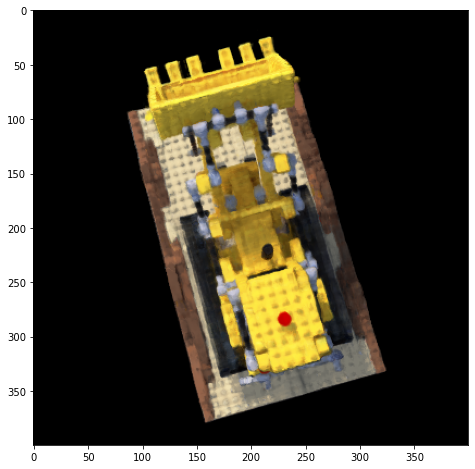

In [100]:
plt.figure(figsize=(8,8))
plt.imshow(test_imgs[0])

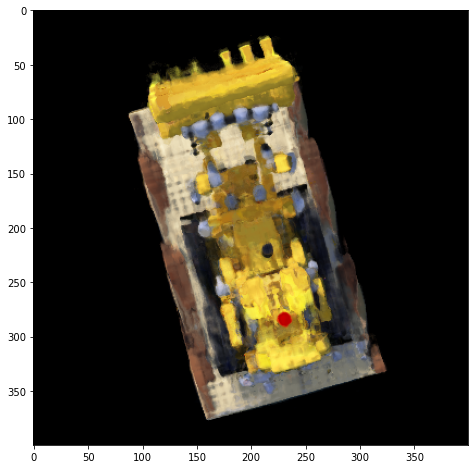

In [69]:
plt.figure(figsize=(8,8))
plt.imshow(test_imgs[0])

In [101]:
print(np.mean(MSEs))
print(np.mean(MAEs))
print(np.mean(PSNRs))
print(np.mean(SSIMs))

71.74598399804954
111.94544162138986
29.579518238780064
0.8835564142181809


In [97]:
print(np.mean(MSEs))
print(np.mean(MAEs))
print(np.mean(PSNRs))
print(np.mean(SSIMs))

74.96957226581755
110.40706835293565
29.387427025900717
0.8682070952867297


In [94]:
print(np.mean(MSEs))
print(np.mean(MAEs))
print(np.mean(PSNRs))
print(np.mean(SSIMs))

74.7599360360409
115.40023401787738
29.399319062550784
0.8617784303710563


In [91]:
print(np.mean(MSEs))
print(np.mean(MAEs))
print(np.mean(PSNRs))
print(np.mean(SSIMs))

76.81699479545148
112.0047758122872
29.279797898880624
0.8337887559715605


In [87]:
print(np.mean(MSEs))
print(np.mean(MAEs))
print(np.mean(PSNRs))
print(np.mean(SSIMs))

92.45991354648613
117.49625098548636
28.475145080124392
0.7317069344145767


In [80]:
print(np.mean(MSEs))
print(np.mean(MAEs))
print(np.mean(PSNRs))
print(np.mean(SSIMs))

81.01156654353842
108.42497678646518
29.04828549824965
0.8237467153700987


In [83]:
print(np.mean(MSEs))
print(np.mean(MAEs))
print(np.mean(PSNRs))
print(np.mean(SSIMs))

85.82962827846295
117.65244131994353
28.79892098011989
0.777050019985659
